In [1]:
import pandas as pd
from pathlib import Path
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append("/home/psa_images/SemiF-AnnotationPipeline")
sys.path.append("/home/psa_images/SemiF-AnnotationPipeline/segment")
from utils.viz import batch_species_count_plot, compile_cutout_csvs


/home/mkutuga/anaconda3/envs/semif/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# cutout_dir = Path(
# "/home/psa_images/SemiF-AnnotationPipeline/data/semifield-cutouts")
cutout_dir = Path(
    "/mnt/research-projects/s/screberg/longterm_images/semifield-cutouts")
# batch_dir = f"/mnt/research-projects/s/screberg/longterm_images/semifield-developed-images"

df = compile_cutout_csvs(cutout_dir)
df.groupby(["common_name"]).count()
df = df[df["common_name"] != "unknown"]


54it [00:06,  8.80it/s]


In [27]:
# df = df.drop_duplicates(subset=['image_id'])
# df.groupby(["batch_id"])["image_id"].count().sum() / len(
#     df.groupby(["batch_id"])["image_id"].count())

# 423 avg images per batch
# 5000 avg sub-images per batch
# 250 - 350 batches
df.groupby(["common_name"])["image_id"].count()

common_name
Barley                      3
Black oats               1783
Cereal rye               2439
Cocklebur               12387
Common lambsquarters    13006
Common ragweed          17096
Fall panicum             3455
Giant foxtail           34820
Goosegrass               8538
Horseweed                3957
Jimson weed             11472
Large crabgrass         12735
Maize                    3409
Mustards                  291
Oats                     1456
Palmer amaranth         16163
Purple nutsedge          7401
Sicklepod               11893
Smooth pigweed          10053
Soybean                 14462
Texas millet             8766
Triticale                3581
Velvetleaf              13115
Winter wheat             4736
Yellow foxtail          32722
colorchecker             2141
cultivated radish         484
Name: image_id, dtype: int64

In [24]:
# 350 * 5000
# 250 * 423

1750000

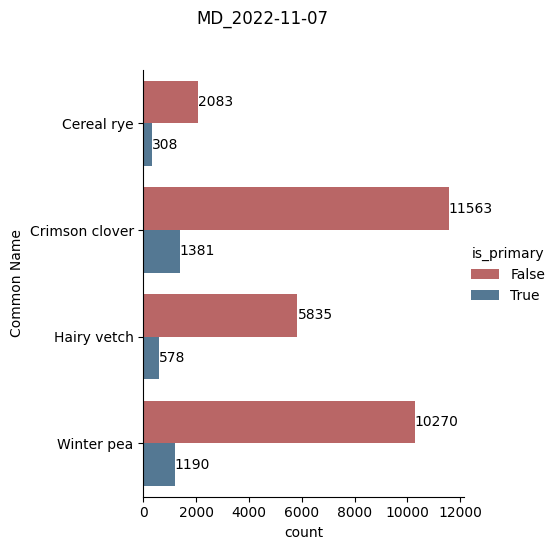

In [3]:
ndf = df[df["common_name"] != "colorchecker"]

batch_species_count_plot(ndf,
                         fig_save_dir=".",
                         title=True,
                         save=False,
                         custom_palette=['#c75858', '#4a7a9d'],
                         transparent=False)

ValueError: cannot convert float NaN to integer

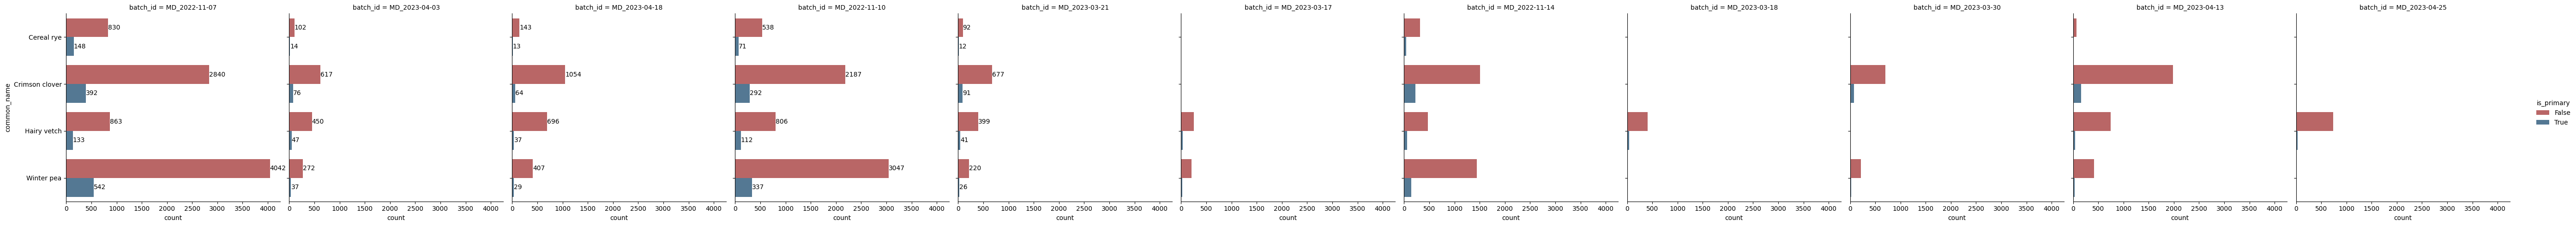

In [4]:
custom_palette = ['#c75858', '#4a7a9d']
title = True

g = sns.catplot(data=ndf,
                y="common_name",
                kind="count",
                hue="is_primary",
                col="batch_id",
                palette=custom_palette)
# Iterate through the axes to add annotations
for ax in g.axes.flat:
    # Get the patches (bars) and their heights
    for p in ax.patches:
        # Get the height of the bar (this is the count)
        width = p.get_width()
        # Add a text annotation for each bar, placing it just beside the bar
        ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.),
                    ha='left',
                    va='center')

batch_id = df["batch_id"].iloc[0]
if title:
    # Add a title
    g.fig.suptitle(f'{batch_id}', y=1.09)

# Change the y-axis label
g.set_axis_labels(y_var='Common Name')

plt.show()

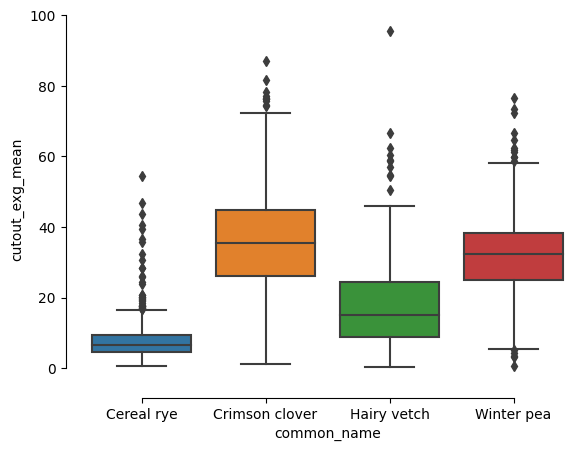

In [5]:
# sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
ndf = ndf[ndf["is_primary"] == True]
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="common_name", y="cutout_exg_mean", data=ndf)
sns.despine(offset=10, trim=True)

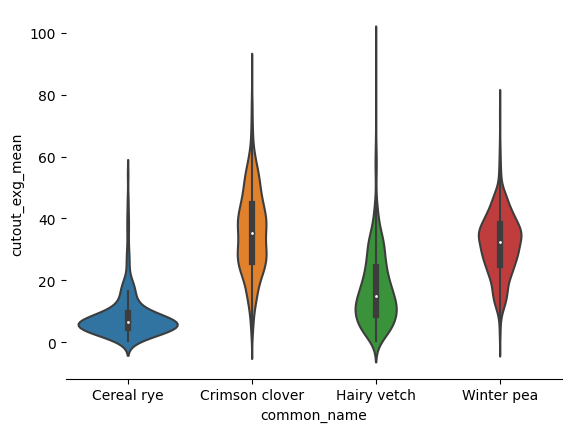

In [7]:
# Draw a nested violinplot and split the violins for easier comparison
# sns.violinplot(data=ndf, x="common_name", y="green_sum")
sns.violinplot(data=ndf, x="common_name", y="cutout_exg_mean")
sns.despine(left=True)

In [9]:
features = [
    'is_primary', 'extends_border', 'cropout_exg_mean', 'cropout_exg_std',
    'cropout_gli_mean', 'cropout_gli_std', 'cropout_r_mean', 'cropout_r_std',
    'cropout_r_skewness', 'cropout_r_kurtosis', 'cropout_r_variance',
    'cropout_g_mean', 'cropout_g_std', 'cropout_g_skewness',
    'cropout_g_kurtosis', 'cropout_g_variance', 'cropout_b_mean',
    'cropout_b_std', 'cropout_b_skewness', 'cropout_b_kurtosis',
    'cropout_b_variance', 'cutout_exg_mean', 'cutout_exg_std',
    'cutout_gli_mean', 'cutout_gli_std', 'cutout_r_mean', 'cutout_r_std',
    'cutout_r_skewness', 'cutout_r_kurtosis', 'cutout_r_variance',
    'cutout_g_mean', 'cutout_g_std', 'cutout_g_skewness', 'cutout_g_kurtosis',
    'cutout_g_variance', 'cutout_b_mean', 'cutout_b_std', 'cutout_b_skewness',
    'cutout_b_kurtosis', 'cutout_b_variance', 'area', 'axis_major_length',
    'axis_minor_length', 'centroid0', 'centroid1', 'eccentricity', 'solidity',
    'perimeter', 'green_sum', 'blur_effect', 'num_components'
]
df = ndf[features]
df.dtypes

is_primary               bool
extends_border           bool
cropout_exg_mean      float64
cropout_exg_std       float64
cropout_gli_mean      float64
cropout_gli_std       float64
cropout_r_mean        float64
cropout_r_std         float64
cropout_r_skewness    float64
cropout_r_kurtosis    float64
cropout_r_variance    float64
cropout_g_mean        float64
cropout_g_std         float64
cropout_g_skewness    float64
cropout_g_kurtosis    float64
cropout_g_variance    float64
cropout_b_mean        float64
cropout_b_std         float64
cropout_b_skewness    float64
cropout_b_kurtosis    float64
cropout_b_variance    float64
cutout_exg_mean       float64
cutout_exg_std        float64
cutout_gli_mean       float64
cutout_gli_std        float64
cutout_r_mean         float64
cutout_r_std          float64
cutout_r_skewness     float64
cutout_r_kurtosis     float64
cutout_r_variance     float64
cutout_g_mean         float64
cutout_g_std          float64
cutout_g_skewness     float64
cutout_g_k

In [10]:
import pandas as pd
from scipy import stats
from sklearn.covariance import MinCovDet
from sklearn.ensemble import IsolationForest
import numpy as np

df = compile_cutout_csvs(cutout_dir)
df.groupby(["common_name"]).count()
df = df[df["common_name"] != "unknown"]
df = df[df["common_name"] != "colorchecker"]
# df = df[df["is_primary"] == True]
df = df[features]

# Mahalanobis Distance Method
cov_matrix = MinCovDet().fit(df)
mahalanobis_distance = cov_matrix.mahalanobis(df)
threshold = stats.chi2.ppf(0.999, df.shape[1])  # 99.9% confidence level
df_no_outliers_mahalanobis = df[mahalanobis_distance < threshold]

# Isolation Forest
isolation_forest = IsolationForest(contamination=0.01)  # 1% outliers
outliers_prediction = isolation_forest.fit_predict(df)
df_no_outliers_isolation_forest = df[outliers_prediction == 1]


/home/mkutuga/anaconda3/envs/semif/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [13]:
df["outliers"] = outliers_prediction

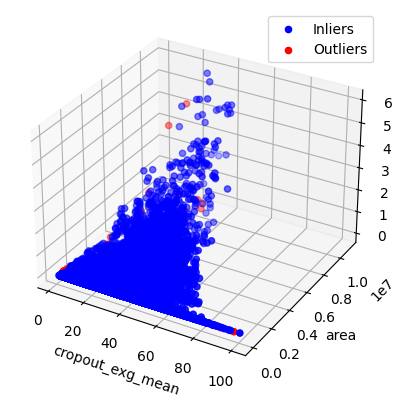

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the inliers
ax.scatter(df.loc[df['outliers'] == 1, 'cropout_exg_mean'],
           df.loc[df['outliers'] == 1, 'area'],
           df.loc[df['outliers'] == 1, 'green_sum'],
           c='blue',
           label='Inliers')

# Plot the outliers
ax.scatter(df.loc[df['outliers'] == -1, 'cropout_exg_mean'],
           df.loc[df['outliers'] == -1, 'area'],
           df.loc[df['outliers'] == -1, 'green_sum'],
           c='red',
           label='Outliers')

ax.set_xlabel('cropout_exg_mean')
ax.set_ylabel('area')
ax.set_zlabel('green_sum')
plt.legend()
plt.show()


In [15]:
# Convert outliers column to boolean for better labeling
df['outliers'] = df['outliers'] == -1

sns.pairplot(df, hue='outliers', diag_kind='kde', markers=["o", "s"])
plt.show()


KeyboardInterrupt: 

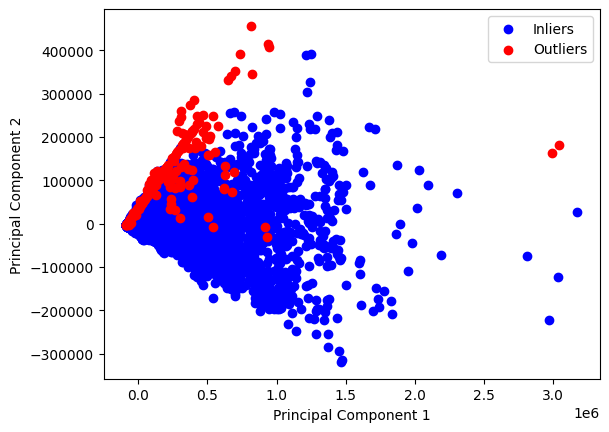

In [34]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('outliers', axis=1))

# Plot the inliers
plt.scatter(df_pca[df['outliers'] == 1, 0],
            df_pca[df['outliers'] == 1, 1],
            c='blue',
            label='Inliers')

# Plot the outliers
plt.scatter(df_pca[df['outliers'] == -1, 0],
            df_pca[df['outliers'] == -1, 1],
            c='red',
            label='Outliers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
